In [11]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

(900, 1600, 3)


In [31]:
img = imread("statue.webp",)


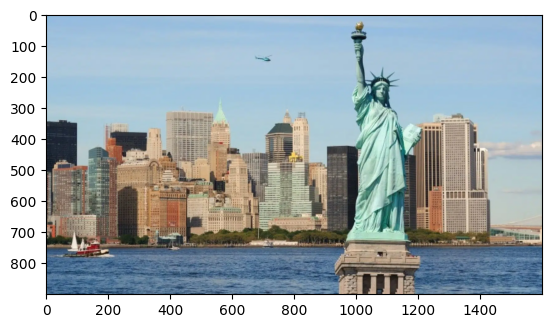

(900, 1600, 3)


In [32]:
# Знаходження вектора
plt.imshow(img)
plt.show()

image_raw = img
print(image_raw.shape)  

(900, 1600)
1.0


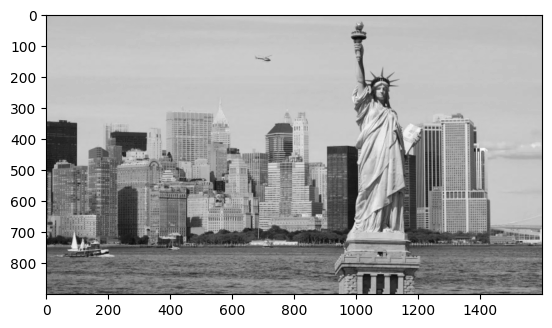

In [37]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())


# перетворення на чорно-біле
img_gray = img.mean(axis=2)

# Відобразити чорно-біле зображення
plt.imshow(img_gray, cmap='gray')
plt.show()

